# Clustering Group of Machines

### Dataset Used - 
 http://gwa.ewi.tudelft.nl/datasets/gwa-t-13-materna

In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#unzip the data file
!unzip -q '/content/drive/My Drive/GWA-T-13_Materna-Workload-Traces.zip'

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
#List of input data folder i.e. Materna-Trace-1, Materna-Trace-2, Materna-Trace-3
Materna_Traces = ['/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1', 
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-2',
        '/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-3']

In [5]:
#function to read the input data
def readInputData(paths):
  #iterate each data folder
  for path in paths:
    #All csv files in current data folder
    all_files = glob.glob(path + "/*.csv")
    
    data = []
    for filename in all_files:
        #read each csv file
        df = pd.read_csv(filename, delimiter=';', index_col=None, header=0)
        #append the data
        data.append(df)
    #merge the data and make dataframe
    dataframe = pd.concat(data, axis=0, ignore_index=True)
  return dataframe

In [6]:
#call the function
inputData = readInputData(Materna_Traces)

In [7]:
 #first 5 rows of data
 inputData.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,04.01.2016 00:00:00,2,0,14,"0,32",4194304,80531,"1,92",0,1,24,0,0
1,04.01.2016 00:05:00,2,0,15,"0,34",4194304,63753,"1,52",0,1,24,0,0
2,04.01.2016 00:10:00,2,0,27,"0,6",4194304,312476,"7,45",0,2,24,1,24
3,04.01.2016 00:15:00,2,0,14,"0,32",4194304,387973,"9,25",0,1,24,0,0
4,04.01.2016 00:20:00,2,0,15,"0,33",4194304,102760,"2,45",0,1,24,0,0


In [9]:
#number of rows and columns in data
inputData.shape
df = inputData

In [10]:
df.describe()

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06
mean,2.637684e+00,3.982851e+00,2.596080e+02,8.873539e+06,7.058790e+05,5.352213e+02,1.790060e+02,9.293955e+01,1.396144e+02
std,1.628044e+00,9.022759e+01,6.365165e+02,1.009509e+07,1.135087e+06,6.929329e+03,1.533413e+03,9.121657e+02,1.434829e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,1.048576e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,2.400000e+01,4.194304e+06,8.053100e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,6.900000e+01,8.388608e+06,2.231370e+05,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00
75%,4.000000e+00,0.000000e+00,1.840000e+02,1.048576e+07,8.719960e+05,0.000000e+00,3.900000e+01,1.500000e+01,1.700000e+01
max,8.000000e+00,2.048000e+03,1.552800e+04,1.342177e+08,2.365252e+07,3.779170e+05,1.449880e+05,1.126790e+05,1.142190e+05


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329730 entries, 0 to 5329729
Data columns (total 13 columns):
 #   Column                                 Dtype 
---  ------                                 ----- 
 0   Timestamp                              object
 1   CPU cores                              int64 
 2   CPU capacity provisioned [MHZ]         int64 
 3   CPU usage [MHZ]                        int64 
 4   CPU usage [%]                          object
 5   Memory capacity provisioned [KB]       int64 
 6   Memory usage [KB]                      int64 
 7   Memory usage [%]                       object
 8   Disk read throughput [KB/s]            int64 
 9   Disk write throughput [KB/s]           int64 
 10  Disk size [GB]                         object
 11  Network received throughput [KB/s]     int64 
 12  Network transmitted throughput [KB/s]  int64 
dtypes: int64(9), object(4)
memory usage: 528.6+ MB


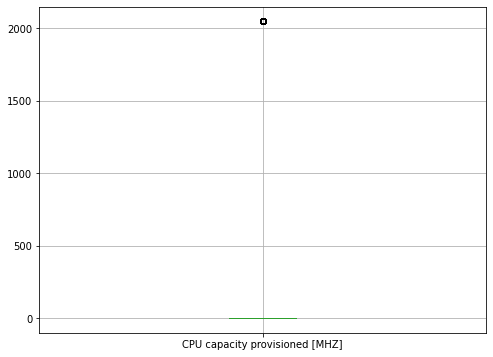

In [12]:
plt.figure(figsize = (8,6))
df.boxplot(column = ['CPU capacity provisioned [MHZ]'])
plt.show()

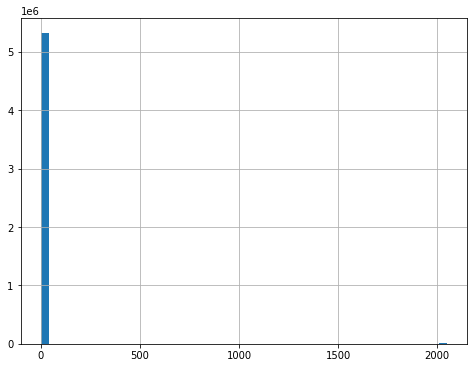

In [13]:
plt.figure(figsize = (8,6))
df['CPU capacity provisioned [MHZ]'].hist(bins = 50)
plt.show()

In [14]:
df['CPU capacity provisioned [MHZ]'].value_counts(0)

0       5319365
2048      10365
Name: CPU capacity provisioned [MHZ], dtype: int64

In [15]:
df['CPU cores'].value_counts()

2    3292311
4     965682
1     670847
8     267303
6     133587
Name: CPU cores, dtype: int64

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where

In [17]:
def dbscan(eps, min_samples, data, start, end):
  # define the model
  model = DBSCAN(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, start], data[row_ix, end])
    plt.title("eps="+str(eps)+"    "+"min_samples="+str(min_samples))
  # show the plot
  plt.show()

In [18]:
df.describe()

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06
mean,2.637684e+00,3.982851e+00,2.596080e+02,8.873539e+06,7.058790e+05,5.352213e+02,1.790060e+02,9.293955e+01,1.396144e+02
std,1.628044e+00,9.022759e+01,6.365165e+02,1.009509e+07,1.135087e+06,6.929329e+03,1.533413e+03,9.121657e+02,1.434829e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,1.048576e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,2.400000e+01,4.194304e+06,8.053100e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,6.900000e+01,8.388608e+06,2.231370e+05,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00
75%,4.000000e+00,0.000000e+00,1.840000e+02,1.048576e+07,8.719960e+05,0.000000e+00,3.900000e+01,1.500000e+01,1.700000e+01
max,8.000000e+00,2.048000e+03,1.552800e+04,1.342177e+08,2.365252e+07,3.779170e+05,1.449880e+05,1.126790e+05,1.142190e+05


In [19]:
df['CPU capacity provisioned [MHZ]'].value_counts(0)

0       5319365
2048      10365
Name: CPU capacity provisioned [MHZ], dtype: int64

In [20]:
df['CPU usage [MHZ]'].value_counts()

19      97579
20      93277
10      93208
21      92300
9       90987
        ...  
7810        1
4533        1
9847        1
7805        1
6770        1
Name: CPU usage [MHZ], Length: 7834, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


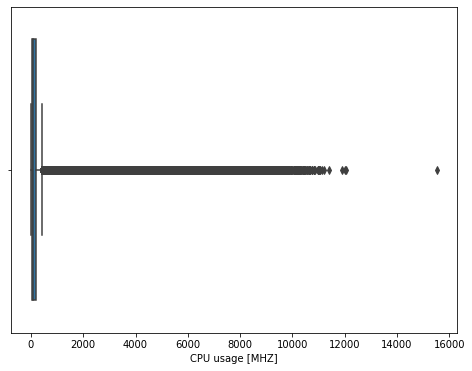

In [21]:
plt.figure(figsize = (8,6))
sns.boxplot(df['CPU usage [MHZ]'])
plt.show()

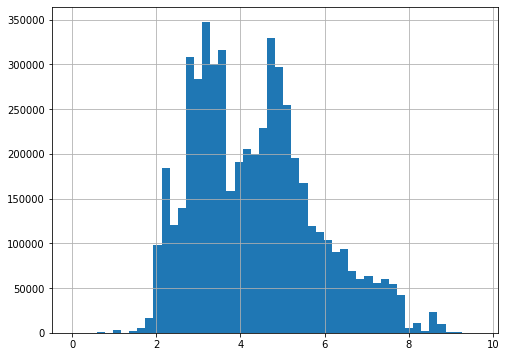

In [22]:
plt.figure(figsize = (8,6))
np.log(df['CPU usage [MHZ]']).hist(bins = 50)#this feature was very robust earlier. By taking the log of the feature we are
                                            # getting a normalized curve.
plt.show()

In [23]:
df['Memory capacity provisioned [KB]'].value_counts()

8388608      1433188
4194304      1203174
2097152      1056096
16777216      674636
12582912      270124
6291456       170476
25165824      155506
20971520      112865
10485760       62203
33554432       46940
14680064       41170
3145728        38850
1048576        31104
134217728      20736
5242880        10368
50331648        2294
Name: Memory capacity provisioned [KB], dtype: int64

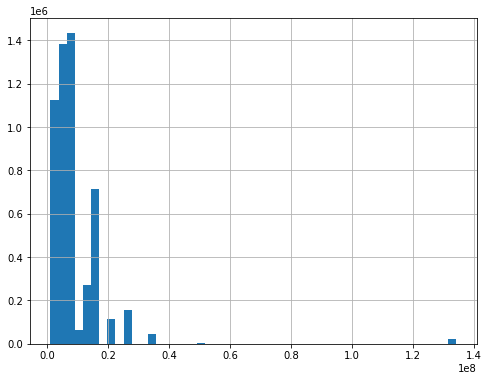

In [24]:
plt.figure(figsize = (8,6))
df['Memory capacity provisioned [KB]'].hist(bins = 50)
plt.show()

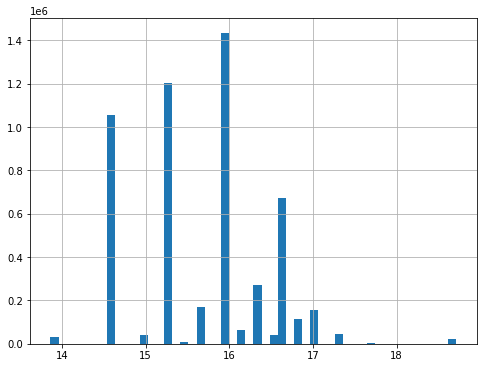

In [25]:
plt.figure(figsize = (8,6))
np.log(df['Memory capacity provisioned [KB]']).hist(bins = 50)
plt.show()

In [26]:
np.log(df['Memory capacity provisioned [KB]']).describe()

count    5.329730e+06
mean     1.567225e+01
std      7.905589e-01
min      1.386294e+01
25%      1.524924e+01
50%      1.594239e+01
75%      1.616553e+01
max      1.871497e+01
Name: Memory capacity provisioned [KB], dtype: float64

In [27]:
df.describe()

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06,5.329730e+06
mean,2.637684e+00,3.982851e+00,2.596080e+02,8.873539e+06,7.058790e+05,5.352213e+02,1.790060e+02,9.293955e+01,1.396144e+02
std,1.628044e+00,9.022759e+01,6.365165e+02,1.009509e+07,1.135087e+06,6.929329e+03,1.533413e+03,9.121657e+02,1.434829e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,1.048576e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,2.400000e+01,4.194304e+06,8.053100e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,6.900000e+01,8.388608e+06,2.231370e+05,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00
75%,4.000000e+00,0.000000e+00,1.840000e+02,1.048576e+07,8.719960e+05,0.000000e+00,3.900000e+01,1.500000e+01,1.700000e+01
max,8.000000e+00,2.048000e+03,1.552800e+04,1.342177e+08,2.365252e+07,3.779170e+05,1.449880e+05,1.126790e+05,1.142190e+05


In [28]:
df['Memory usage [KB]'].value_counts()

0           327072
65431        25614
41524        23971
83467        22857
55365        22773
             ...  
123313           1
10920709         1
7449084          1
1975308          1
13888179         1
Name: Memory usage [KB], Length: 12980, dtype: int64

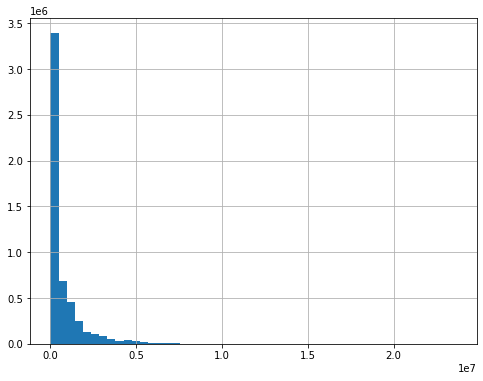

In [29]:
plt.figure(figsize = (8,6))
df['Memory usage [KB]'].hist(bins = 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


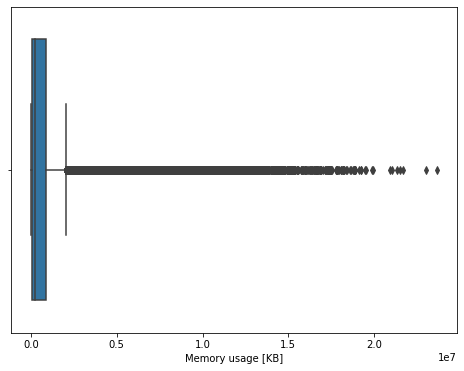

In [30]:
plt.figure(figsize = (8,6))
sns.boxplot(df['Memory usage [KB]'])
plt.show()

In [31]:
df['Disk read throughput [KB/s]'].value_counts()

0         4500772
1          102974
2           50511
3           36984
4           28486
           ...   
26192           1
35844           1
191561          1
13914           1
79858           1
Name: Disk read throughput [KB/s], Length: 43857, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329730 entries, 0 to 5329729
Data columns (total 13 columns):
 #   Column                                 Dtype 
---  ------                                 ----- 
 0   Timestamp                              object
 1   CPU cores                              int64 
 2   CPU capacity provisioned [MHZ]         int64 
 3   CPU usage [MHZ]                        int64 
 4   CPU usage [%]                          object
 5   Memory capacity provisioned [KB]       int64 
 6   Memory usage [KB]                      int64 
 7   Memory usage [%]                       object
 8   Disk read throughput [KB/s]            int64 
 9   Disk write throughput [KB/s]           int64 
 10  Disk size [GB]                         object
 11  Network received throughput [KB/s]     int64 
 12  Network transmitted throughput [KB/s]  int64 
dtypes: int64(9), object(4)
memory usage: 528.6+ MB


In [33]:
df['CPU usage [%]'].value_counts()

0,23     55912
0,22     51117
0,21     50040
0,18     45015
0,41     44539
         ...  
84,57        1
71,04        1
64,92        1
74,27        1
70,36        1
Name: CPU usage [%], Length: 9298, dtype: int64

In [34]:
df['Disk size [GB]'].value_counts()

22              665298
24              353654
438             216576
58              198790
34              190366
                 ...  
1274              1432
114,38671875      1147
522                582
4382               576
6392               288
Name: Disk size [GB], Length: 154, dtype: int64

In [35]:
df = df.drop('Timestamp', axis=1)
#replace , with . in % values
df = df.replace(to_replace=r',', value='.', regex=True)

In [36]:
data = df[["CPU cores", "CPU capacity provisioned [MHZ]", "CPU usage [MHZ]", 
                  "Memory capacity provisioned [KB]",
                  "Memory usage [KB]", "Disk read throughput [KB/s]",
                  "Disk write throughput [KB/s]", "Disk size [GB]",
                  "Network received throughput [KB/s]",
                  "Network transmitted throughput [KB/s]"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


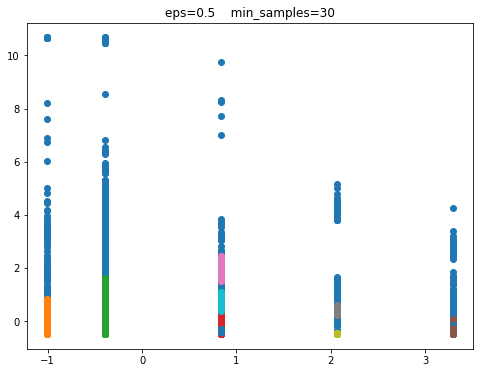

In [37]:
machine_data_std = StandardScaler().fit_transform(df)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, df.shape[0], 10000)
#Apply DBSCAN algorithm
plt.figure(figsize = (8,6))
dbscan(eps=0.5, min_samples=30, data=machine_data_std[machine_data_index], start=0, end=3)
plt.show()

In [38]:
df['CPU usagelog'] = np.log(df['CPU usage [MHZ]'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  import sys


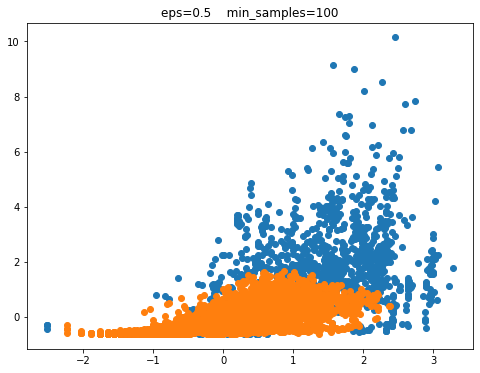

In [39]:
cpu_mem_disk_data = df[['CPU capacity provisioned [MHZ]', 'CPU usagelog', 'Memory capacity provisioned [KB]',
       'Memory usage [KB]', 'Disk read throughput [KB/s]',
       'Disk write throughput [KB/s]', 'Disk size [GB]']]
#standard scale data
cpu_mem_disk_data_std = StandardScaler().fit_transform(cpu_mem_disk_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, df.shape[0], 10000)
#Apply DBSCAN algorithm
plt.figure(figsize = (8,6))
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_data_std[machine_data_index], start=1, end=3)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 5329730 + 1) instead
  


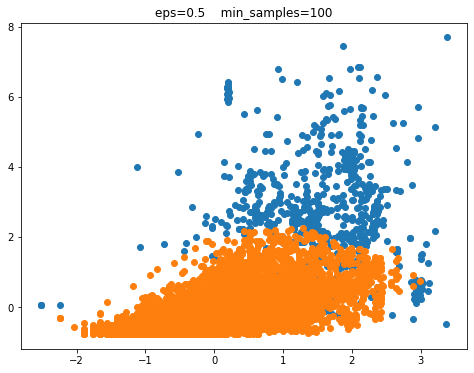

In [40]:
cpu_mem_disk_NW_use_data = df[['CPU usagelog',
                                   'Memory usage [%]',
                                   'Disk read throughput [KB/s]',
                                   'Disk write throughput [KB/s]']]
#standard scale data                          
cpu_mem_disk_NW_use_data_std = StandardScaler().fit_transform(cpu_mem_disk_NW_use_data)
#randomly choose ten thousand samples
machine_data_index = np.random.random_integers(1, df.shape[0], 10000)
#Apply DBSCAN algorithm
plt.figure(figsize = (8,6))
dbscan(eps=0.5, min_samples=100, data=cpu_mem_disk_NW_use_data_std[machine_data_index], start=0, end=1)
plt.show()

# **CONCLUSION**
*'CPU usage [MHz]'this feature was very robust earlier. By taking the log of the feature we are getting a normalized curve. And hence we can use CPU usagelog,Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s]¶*